### **1. Importações**

In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import Normalize

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2


In [14]:
base = pd.read_csv("../data/categoria_aquatic.csv")
base['Date'] = pd.to_datetime(base['Date'], format="%Y-%m-%d")
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana
0,2020-07-01,09:22,102900005118824,0.251,10.0,sale,No,1,7,9,2.51,High Melon (1),Aquatic Tuberous Vegetables,Wednesday
1,2020-07-01,09:25,102900005118824,0.711,10.0,sale,No,1,7,9,7.11,High Melon (1),Aquatic Tuberous Vegetables,Wednesday
2,2020-07-01,09:46,102900051000944,0.545,39.8,sale,No,1,7,9,21.69,Honghu Lotus Root,Aquatic Tuberous Vegetables,Wednesday
3,2020-07-01,11:01,102900005118824,0.291,10.0,sale,No,1,7,11,2.91,High Melon (1),Aquatic Tuberous Vegetables,Wednesday
4,2020-07-01,11:02,102900005118824,0.361,10.0,sale,No,1,7,11,3.61,High Melon (1),Aquatic Tuberous Vegetables,Wednesday


### **2. Visualizando os produtos mais vendidos no decorrer das horas**
- A % é baseada na porcentagem de vendas total do produto

In [15]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)
vendidos = pd.DataFrame(base['Item Name'].value_counts())
percentual_vendas_por_hora = pd.merge(percentual_vendas_por_hora, vendidos,how='left', on='Item Name')

percentual_vendas_por_hora.head()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
Fresh Lotus Root Zone (Bag),10.53,15.79,10.53,5.26,10.53,5.26,0.00,0.00,5.26,5.26,0.00,5.26,26.32,0.0,19
High Melon (1),21.33,22.53,11.18,4.52,3.74,3.29,5.70,6.43,7.73,6.72,3.68,2.58,0.56,0.0,3559
High Melon (2),12.93,13.34,10.44,4.72,2.28,3.43,3.95,5.61,7.27,7.17,10.33,12.93,5.61,0.0,1926
Honghu Lotus (Lotus Root),5.00,10.00,2.50,15.00,0.00,2.50,10.00,5.00,12.50,10.00,5.00,20.00,2.50,0.0,40
Honghu Lotus Root,16.98,21.48,14.61,6.19,3.68,3.68,5.22,7.16,9.34,5.71,3.39,2.03,0.53,0.0,2067


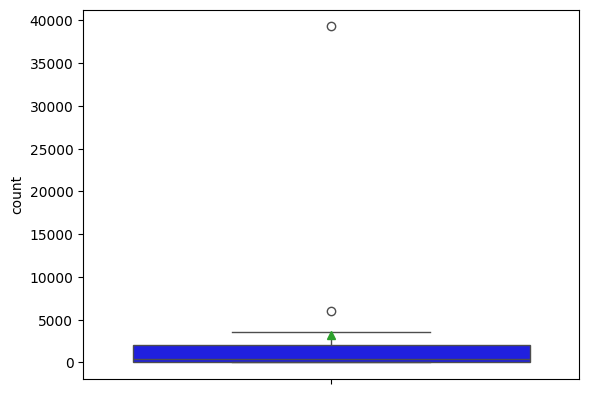

In [16]:
sns.boxplot(percentual_vendas_por_hora['count'], showmeans=True, color='blue')
plt.savefig("../images/03_01_EDA_aquatic_tuberous_vegetables_01_distribuicao.png")


In [17]:
percentual_vendas_por_hora.describe()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.637222,14.788333,10.872778,5.339444,4.372222,5.662222,7.031667,7.912778,10.180000,7.664444,5.621667,7.451111,3.461667,0.004444,3258.166667
std,5.401159,4.962331,5.383588,3.170534,2.414097,3.252262,3.005376,3.017406,4.210269,3.391485,3.560985,6.502896,6.266039,0.018856,9135.187485
min,0.000000,5.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.260000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,5.957500,10.440000,8.585000,4.567500,3.695000,3.817500,5.312500,5.815000,7.922500,6.232500,3.402500,1.872500,0.032500,0.000000,48.750000
50%,9.540000,14.160000,10.600000,5.470000,4.625000,5.400000,6.530000,8.790000,9.395000,7.165000,5.455000,6.580000,1.035000,0.000000,423.500000
75%,12.785000,19.210000,14.560000,6.112500,5.350000,5.715000,9.460000,9.737500,10.365000,9.245000,8.867500,10.932500,3.700000,0.000000,2031.750000
max,21.330000,22.530000,23.530000,15.000000,10.530000,14.710000,13.480000,12.460000,21.050000,15.790000,10.530000,20.000000,26.320000,0.080000,39285.000000


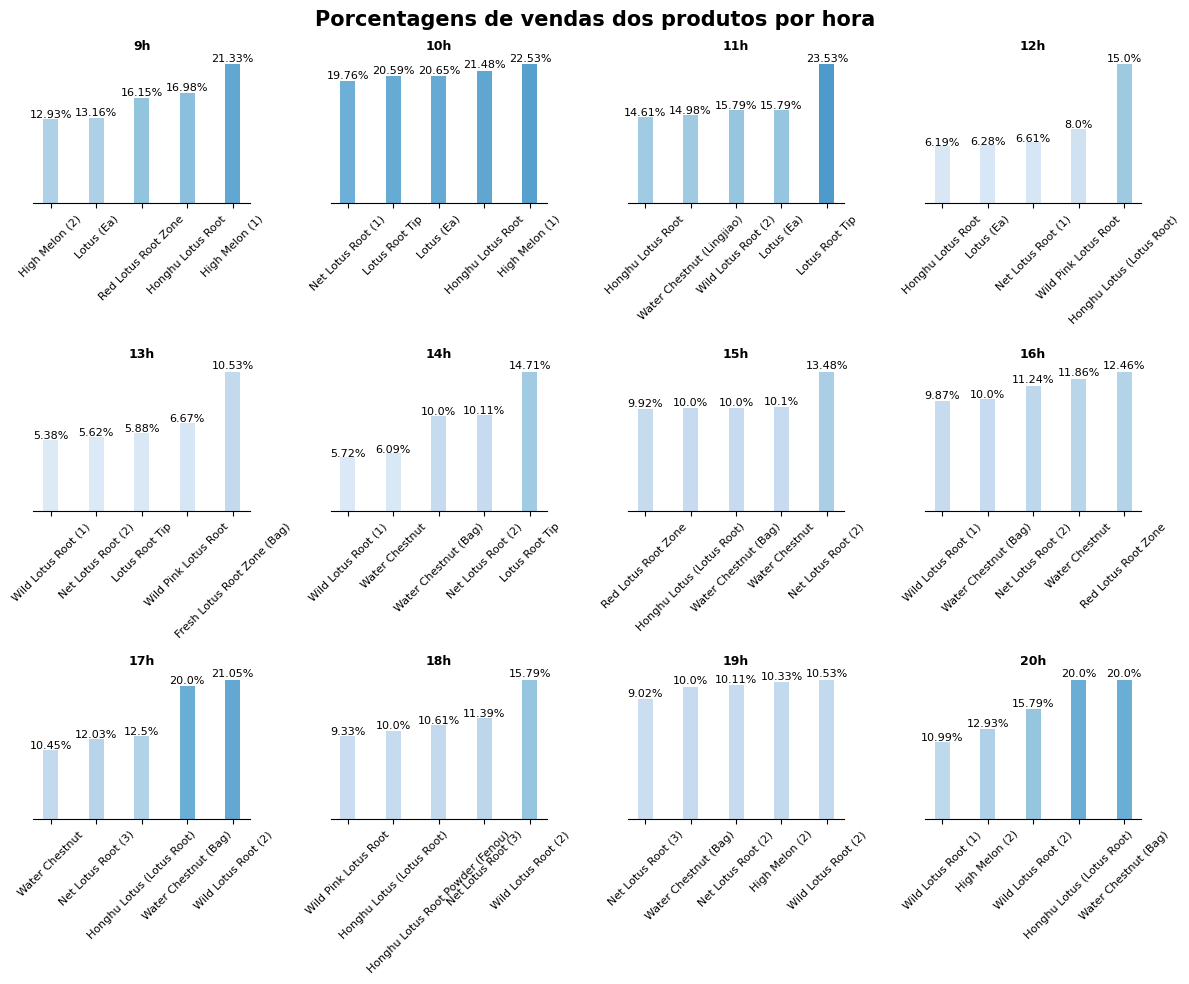

In [18]:
horas = ['9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h']

fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(12,10),tight_layout=True)

for hora,ax in zip(horas,axs.flat):
    
    b = percentual_vendas_por_hora[hora]
    a = b.sort_values(ascending=False).head(5).sort_values()
    norm = Normalize(vmin=0, vmax=40)
    cmap = plt.get_cmap('Blues')  
    colors = cmap(norm(a.values))
    w = 0.33
    ax.bar(a.index, a.values, color=colors, width=w)
    ax.set_title(f'{hora}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(f'{a.values[i]}%',(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=45, fontsize=8)
plt.suptitle("Porcentagens de vendas dos produtos por hora", fontsize=15, fontweight='bold')
plt.savefig("../images/03_01_EDA_aquatic_tuberous_vegetables_02_porcentagem_vendas_produtos.png")
plt.show()

### **3. Analisando as vendas, agrupadas pelo dia da semana**

In [19]:
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana
0,2020-07-01,09:22,102900005118824,0.251,10.0,sale,No,1,7,9,2.51,High Melon (1),Aquatic Tuberous Vegetables,Wednesday
1,2020-07-01,09:25,102900005118824,0.711,10.0,sale,No,1,7,9,7.11,High Melon (1),Aquatic Tuberous Vegetables,Wednesday
2,2020-07-01,09:46,102900051000944,0.545,39.8,sale,No,1,7,9,21.69,Honghu Lotus Root,Aquatic Tuberous Vegetables,Wednesday
3,2020-07-01,11:01,102900005118824,0.291,10.0,sale,No,1,7,11,2.91,High Melon (1),Aquatic Tuberous Vegetables,Wednesday
4,2020-07-01,11:02,102900005118824,0.361,10.0,sale,No,1,7,11,3.61,High Melon (1),Aquatic Tuberous Vegetables,Wednesday


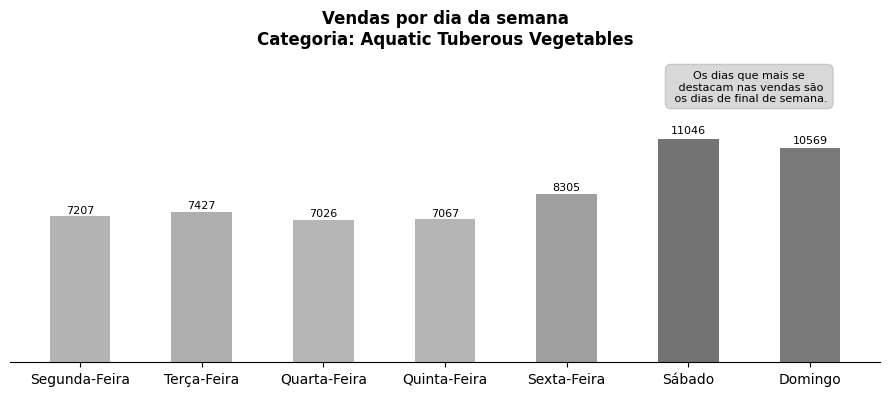

In [20]:
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

a = base['Dia da semana'].value_counts().sort_index()
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
a = a.reindex(ind)

fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.6)
cmap = plt.get_cmap('Greys')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors, width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(titulos)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(5.5, 12900, "Os dias que mais se\n destacam nas vendas são\n os dias de final de semana.", ha='center',fontsize=8,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas por dia da semana\nCategoria: Aquatic Tuberous Vegetables", fontweight='bold', fontsize=12)
plt.savefig("../images/03_01_EDA_aquatic_tuberous_vegetables_03_vendas_dia_semana.png")

plt.show()

### **4. Visualizando os produtos mais vendidos dessa categoria**

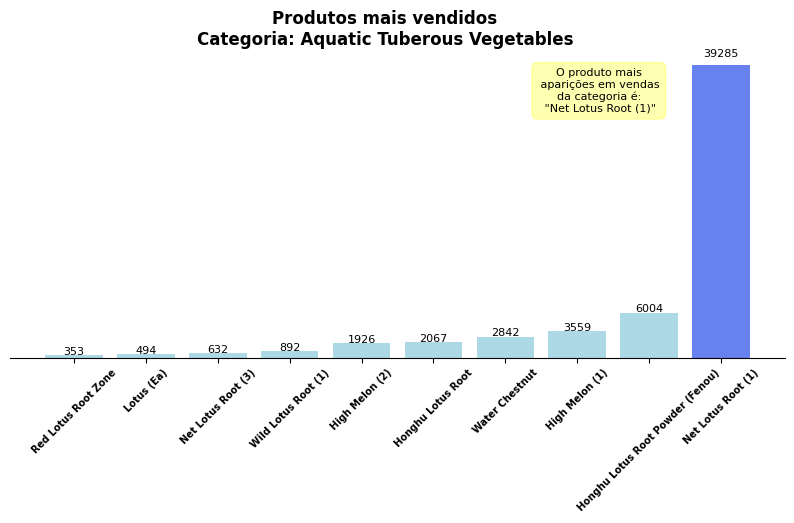

In [21]:
a = base['Item Name'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots(figsize=(10,4))
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('Blues')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color='lightblue')
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(labels=a.index, rotation=45, fontsize=7, fontweight='bold')
ax.bar(a.index[-1],a.values[-1], color='blue',alpha=0.4)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(7.3, 33000, 'O produto mais\n aparições em vendas\nda categoria é:\n "Net Lotus Root (1)"', ha='center',fontsize=8,
        bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.suptitle("Produtos mais vendidos\nCategoria: Aquatic Tuberous Vegetables", fontweight='bold', fontsize=12)
plt.savefig("../images/03_01_EDA_aquatic_tuberous_vegetables_04_produtos_mais_vendidos.png")

plt.show()

In [22]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base.set_index('Date')
base_datas = base_datas.resample('ME').count()

### **5. Analisando o total arrecadado com as vendas**

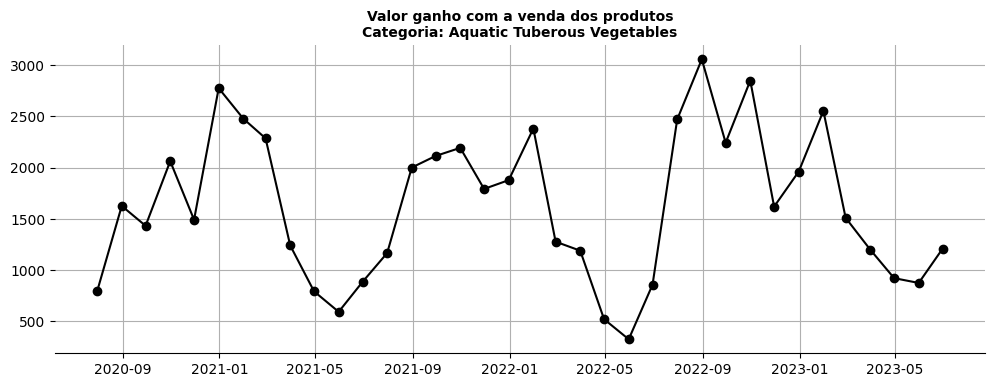

In [23]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base_sale.set_index('Date')
base_datas = base_datas.resample('ME').count()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(base_datas['Total'], marker='o', color='black')
ax.set_title("Valor ganho com a venda dos produtos\nCategoria: Aquatic Tuberous Vegetables", fontsize=10, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
plt.savefig("../images/03_01_EDA_aquatic_tuberous_vegetables_05_valor_ganho_vendas.png")
plt.show()

### **6. Analisando as vendas agrupadas pelos meses**


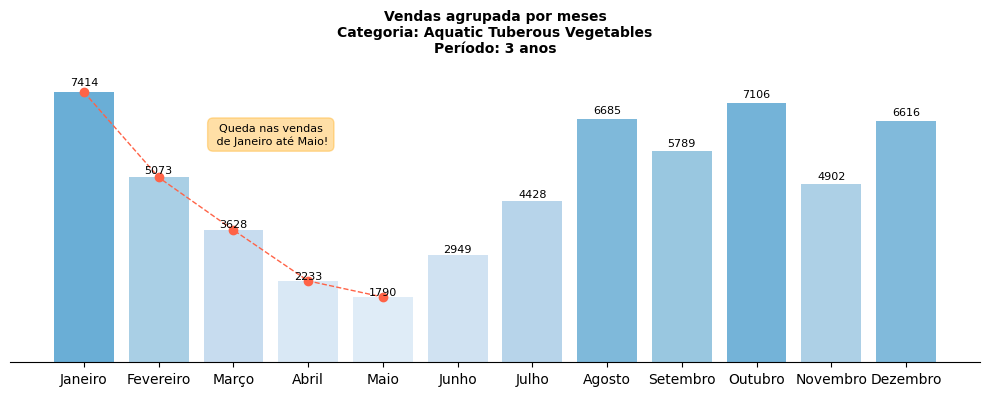

In [24]:
a = base_sale['Mês'].value_counts().sort_index()
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('Blues')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
ax.text(3.5, 6000, 'Queda nas vendas\n de Janeiro até Maio!', ha='center',fontsize=8,
        bbox=dict(facecolor='orange',edgecolor='orange',alpha=0.35, boxstyle='round,pad=0.5'))

ax.plot(a.index[:5],a.values[:5], 'o--', color='tomato', linewidth=1)
plt.suptitle("Vendas agrupada por meses\nCategoria: Aquatic Tuberous Vegetables\nPeríodo: 3 anos", fontweight='bold', fontsize=10)
plt.savefig("../images/03_01_EDA_aquatic_tuberous_vegetables_06_vendas_meses.png")
plt.show()